In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\SuperStoreOrders.csv\SuperStoreOrders.csv")

In [21]:
#viewing the dataset
df.head(5)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.0,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.0,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.0,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45.0,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114.0,5,0.1,37.770,4.70,Medium,2011


In [4]:
#Columns and rows of the dataset
df.shape

(51290, 21)

In [11]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [6]:
#Describing the dataset
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.498440,3.476545,0.142908,28.641740,26.375915,2012.777208
std,487.567175,2.278766,0.212280,174.424113,57.296804,1.098931
min,0.000000,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,31.000000,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.000000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.000000,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.000000,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [7]:
#Names of the columns
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [8]:
#count of unique values in columns
df.nunique()

order_id          25035
order_date         1430
ship_date          1464
ship_mode             4
customer_name       795
segment               3
state              1094
country             147
market                7
region               13
product_id        10292
category              3
sub_category         17
product_name       3788
sales              2246
quantity             14
discount             27
profit            24575
shipping_cost     10037
order_priority        4
year                  4
dtype: int64

In [9]:
#count of Null values in columns
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [10]:
# Changing the Data type of ('Order_date','Ship_date') data Text into Date 
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)
df['ship_date'] = pd.to_datetime(df['ship_date'], dayfirst=True)

In [11]:
#Grouping by year with sum of Sales,Quantity,Discount,Profit
df.groupby('year')[['sales','quantity','discount','profit']].sum()

,sales,quantity,discount,profit
year,,,,
2011,2259511.0,31443,1333.394,248940.81154
2012,2677493.0,38111,1548.774,307415.27910
2013,3405860.0,48136,1935.522,408512.76018
2014,4300041.0,60622,2512.038,504165.97046


In [12]:
#Grouping by Category and Sub-Category with sum of Sales,Quantity,Discount,Profit
df.groupby(['category','sub_category'])[['sales','quantity','discount','profit']].sum()

sales  quantity  discount        profit
category        sub_category                                             
Furniture       Bookcases     1466559.0      8310   370.710  161924.41950
                Chairs        1501682.0     12336   560.120  141973.79750
                Furnishings    385609.0     11225   478.880   46967.42550
                Tables         757034.0      3083   250.320  -64083.38870
Office Supplies Appliances    1011081.0      6078   248.700  141680.58940
                Art            372163.0     16301   573.080   57953.91090
                Binders        461952.0     21429  1102.480   72449.84600
                Envelopes      170926.0      8380   320.810   29601.11630
                Fasteners       83254.0      8390   340.240   11525.42410
                Labels          73433.0      9322   313.890   15010.51200
                Paper          244307.0     12822   387.300   59207.68270
                Storage       1127124.0     16917   700.490  108461.48980
                Supplies       243090.0      8543   310.200   22583.26310
Technology      Accessories    749307.0     10946   370.480  129626.30620
                Copiers       1509439.0      7454   260.418  258567.54818
                Machines       779071.0      4906   252.000   58867.87300
                Phones        1706874.0     11870   489.610  216717.00580

In [13]:
#Grouping by Region with sum of Sales,Quantity,Discount,Profit
df.groupby('region')[['sales','quantity','discount','profit']].sum()

,sales,quantity,discount,profit
region,,,,
Africa,783776.0,10564,718.800,88871.63100
Canada,66932.0,833,0.000,17817.39000
Caribbean,324281.0,6299,229.420,34571.32104
Central,2822399.0,41762,1543.610,311403.98164
Central Asia,752839.0,7715,138.200,132480.18700
EMEA,806184.0,11517,986.100,43897.97100
East,678834.0,10618,414.000,91522.78000
North,1248192.0,18021,459.630,194597.95252
North Asia,848349.0,8851,113.900,165578.42100


In [13]:
#Grouping by Segment of Sales,Quantity,Discount,Profit
df.groupby('segment')[['sales','quantity','discount','profit']].sum()

,sales,quantity,discount,profit
segment,,,,
Consumer,6508141.0,92157,3808.042,749239.78206
Corporate,3824808.0,53565,2205.284,442785.85866
Home Office,2309956.0,32590,1316.402,277009.18056


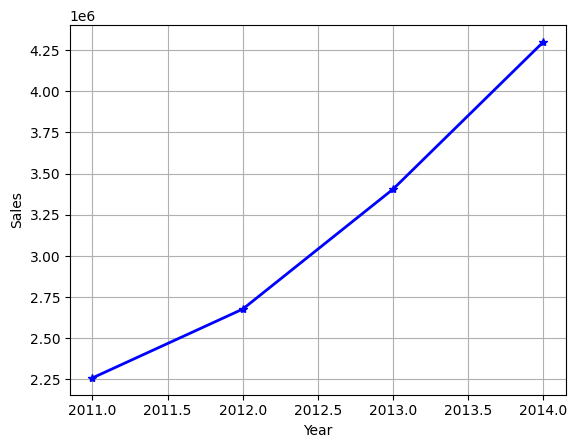

In [14]:
#Line Chart for year sales
df.groupby('year')['sales'].sum().plot(linewidth=2,color='blue',marker='*',grid=True)
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()


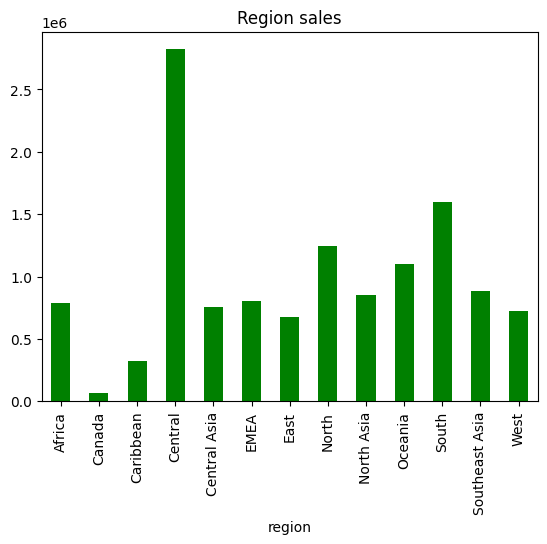

In [15]:
#Bar Chart for region wise sales
df.groupby('region')['sales'].sum().plot(kind='bar',color='green')
plt.title("Region sales")
plt.show()


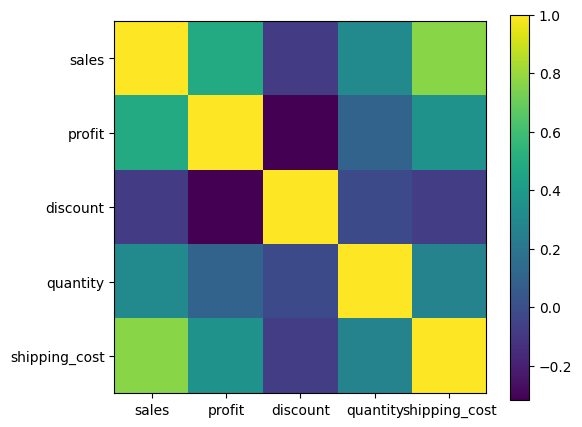

In [16]:
#Heat map for Sales,Profit,Discount,Quantity,Shipping Cost
corr = df[['sales','profit','discount','quantity','shipping_cost']].corr()
plt.figure(figsize=(6,5))
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

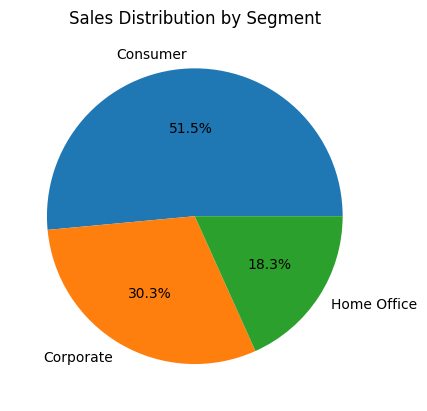

In [14]:
#Sales by segment in pie chart
segment_sales = df.groupby('segment')['sales'].sum()
plt.pie(segment_sales,labels=segment_sales.index,autopct='%1.1f%%')
plt.title('Sales Distribution by Segment')
plt.show()

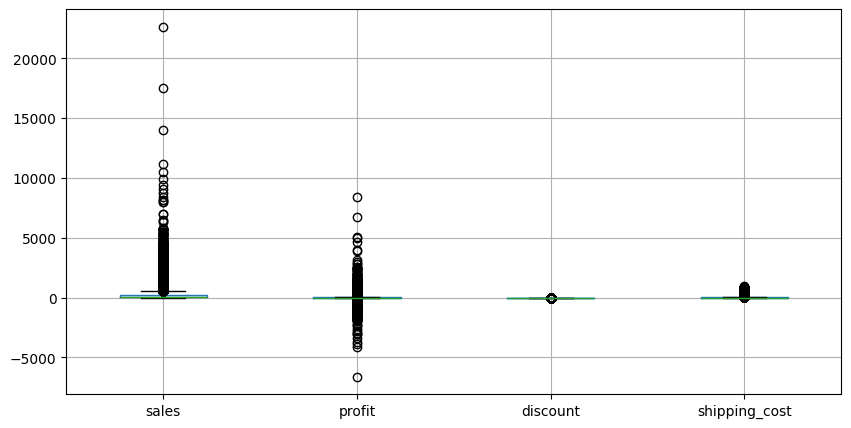

In [17]:
#Showing Boxplot for sales, profit, discount, Shipping_cost
df[['sales','profit','discount','shipping_cost']].boxplot(figsize=(10,5))
plt.show()